In [1]:
import os

import numpy as np
import operator
#from termcolor import colored
import pandas as pd

import nltk
from nltk.corpus import stopwords
#set(stopwordswords.words('english'))
from spacy.lang.en import English
nlp = English()
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

import re

import string

In [98]:
directory = 'reviews_dataset/pos'

In [99]:
import os

text = []
for filename in os.listdir(directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        text.append(line)

In [22]:
def clean_punctuation(text):
    words = re.split(r'\W+', str(text))
    clean_punct = []
    for word in words:
        if word not in string.punctuation:
            clean_punct.append(word)
    return clean_punct

In [17]:
def stop_words_removal(text):
    stopwords = nltk.corpus.stopwords.words('english')
    clean_stop_words = []
    for word in text:
        if word not in stopwords:
            clean_stop_words.append(word)
    return clean_stop_words

In [8]:
def lemmatize_words(text):
    wl = nltk.WordNetLemmatizer()
    doc = [wl.lemmatize(word) for word in text]
    return doc

In [9]:
def clean_code(text):
    punct_free = clean_punctuation(text)
    stopwords = stop_words_removal(punct_free)
    cleaned_text = lemmatize_words(stopwords)
    
    return cleaned_text

In [23]:
text_data = clean_code(positive_corpus)

In [26]:
def word_frequency(text): 
    word_count = {}
    for word_frequency in text:
        if word_frequency in word_count:
            word_count[word_frequency] += 1
        else:
            word_count[word_frequency] = 1
    return word_count

In [27]:
word_frequency = word_frequency(text_data)

In [29]:
keys = word_frequency.keys()
keys = list(keys)

values = word_frequency.values()
values = list(values)

In [30]:
data = {'label': keys, 'freq': values}
word_freq_df = pd.DataFrame(data, columns=['label', 'freq'])

In [31]:
word_freq_df = word_freq_df.sort_values(by='freq', ascending=False)
word_freq_df.head()

,label,freq
0,film,6102
57,nthe,4214
351,movie,3144
303,one,2876
519,character,2056


In [37]:
word_freq_df.freq.value_counts().head(10)

1     11810
2      4416
3      2572
4      1668
5      1192
6       903
7       716
8       592
9       461
10      402
Name: freq, dtype: int64

In [ ]:
type(wo)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

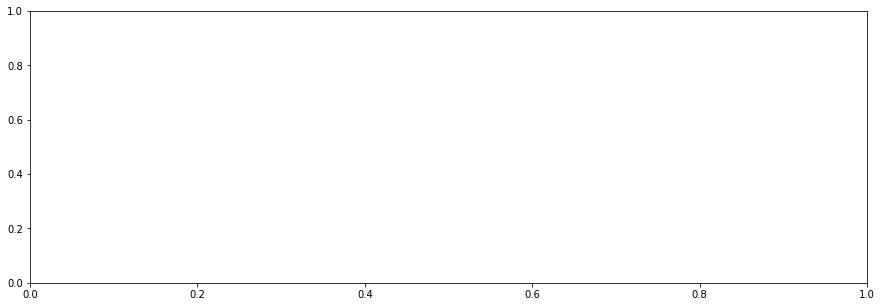

In [46]:
fig,ax = plt.subplots(figsize=(15,5))
sns.barplot(y='label', data=word_freq_df, order=word_freq_df['label'].value_counts().head(10).index, ax=ax)


In [19]:
strings = ' '

In [20]:
lemma_text = strings.join(word_lemma)

In [21]:
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
stopwords.update(["movie", "film", "however", "also"])

wordcloud = WordCloud(max_font_size=50, max_words=100, 
                      
                      stopwords = stopwords).generate(lemma_text) 

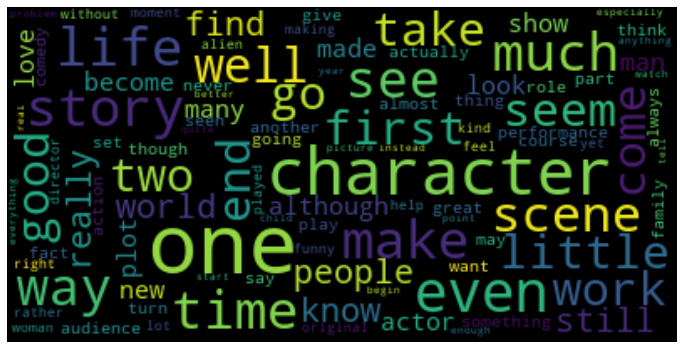

In [22]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# TFIDF Transformer

In [23]:
import os

listed_doc = []
for filename in os.listdir(directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        listed_doc.append(line)

In [30]:
# TFIDF Transformer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(listed_doc, ngram_range= (1,2), stop_words = stopwords, min_df=2, max_df=0.50)
word_count = cv.fit_transform(listed_doc)
word_count

<1000x45776 sparse matrix of type '<class 'numpy.int64'>'
	with 347792 stored elements in Compressed Sparse Row format>

In [31]:
word_count.shape

(1000, 45776)

In [32]:
cv.vocabulary_

{'films': 14762,
 'adapted': 897,
 'comic': 7468,
 'books': 4630,
 'plenty': 30834,
 'success': 39135,
 'whether': 44321,
 'superheroes': 39298,
 'batman': 3548,
 'superman': 39306,
 'spawn': 37760,
 'geared': 16375,
 'toward': 41478,
 'kids': 21560,
 'casper': 5746,
 'arthouse': 2652,
 'crowd': 8733,
 'ghost': 16727,
 'world': 45022,
 'never': 27494,
 'really': 32744,
 'book': 4610,
 'hell': 18587,
 'starters': 38229,
 'created': 8543,
 'alan': 1240,
 'moore': 26126,
 'eddie': 11264,
 'campbell': 5480,
 'brought': 5096,
 'medium': 25265,
 'whole': 44379,
 'new': 27592,
 'level': 22600,
 'mid': 25568,
 '80s': 327,
 '12': 46,
 'part': 29561,
 'series': 35959,
 'called': 5393,
 'say': 34717,
 'thoroughly': 40616,
 'subject': 39064,
 'jack': 20737,
 'ripper': 33925,
 'saying': 34757,
 'michael': 25524,
 'jackson': 20767,
 'starting': 38230,
 'look': 23558,
 'little': 23258,
 'odd': 28277,
 'graphic': 17585,
 'novel': 28071,
 '500': 291,
 'pages': 29402,
 'long': 23496,
 'includes': 19976,

In [33]:
tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
tfidf_transformer.fit(word_count)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [34]:
tfidf_transformer.idf_

array([6.81014249, 4.05860718, 6.81014249, ..., 6.81014249, 5.96284463,
       6.81014249])

In [39]:
cv.get_feature_names()[:10]

['00',
 '000',
 '000 000',
 '000 dollars',
 '000 marks',
 '000 men',
 '000 role',
 '000 year',
 '007',
 '10']

In [43]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(), columns=['idf_weights'])

In [45]:
df_idf.sort_values(by='idf_weights', ascending=False)

,idf_weights
00,6.810142
meditate,6.810142
meets man,6.810142
meets elderly,6.810142
meeting two,6.810142
...,...
people,1.784071
little,1.775357
characters,1.718439
best,1.714349


In [46]:
df_idf.sort_values(by='idf_weights', ascending=True)

,idf_weights
life,1.708246
best,1.714349
characters,1.718439
little,1.775357
people,1.784071
...,...
jailed,6.810142
jade,6.810142
jacques nolot,6.810142
james dean,6.810142


In [47]:
#TF-IDF scores.
#Once you have the IDF values, you can now compute the tf-idf scores for any document or set of documents. 

count_vector = cv.transform(listed_doc)
tf_idf_vector=tfidf_transformer.transform(count_vector)


In [51]:
feature_names = cv.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=tf_idf_vector[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
 

,tfidf
ripper,0.185691
hell,0.156984
comic,0.131704
moore,0.127878
campbell,0.125779
...,...
flaws firstly,0.000000
flaws movie,0.000000
flaws one,0.000000
flaws prevent,0.000000


In [53]:
df.loc[df['tfidf'] !=0.0]

,tfidf
00,0.061897
102,0.061897
12,0.041277
1888,0.061897
30,0.037697
...,...
world enough,0.059282
world never,0.052982
worry,0.045120
would like,0.039831


# TFIDF Vectorizer

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(listed_doc)
tfidf_vectorizer_vectors

<1000x30325 sparse matrix of type '<class 'numpy.float64'>'
	with 345956 stored elements in Compressed Sparse Row format>

In [55]:
tfidf_vectorizer_vectors[0].T.todense()

matrix([[0.05669349],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]])

In [59]:
df_tfidf_vector = pd.DataFrame(tfidf_vectorizer_vectors[0].T.todense(), index = tfidf_vectorizer.get_feature_names(),
                              columns=['tfidf'])

In [66]:
df_tfidf_vector.sort_values(by='tfidf', ascending=False)

,tfidf
the,0.382944
and,0.174997
ripper,0.170080
in,0.150147
hell,0.143787
...,...
fifths,0.000000
fifth,0.000000
fifteen,0.000000
fiesty,0.000000


# ML

In [2]:
pos_directory = 'reviews_dataset/pos/'
neg_directory = 'reviews_dataset/neg/'

In [3]:
# train 
import os

positive_corpus = []
for filename in os.listdir(pos_directory):
    #print(type(filename))
    with open('reviews_dataset/pos/{}'.format(filename), 'r') as f:
        line = f.read()
        positive_corpus.append(line)

In [4]:
# test
import os

negitive_corpus = []
for filename in os.listdir(neg_directory):
    #print(filename)
    with open('reviews_dataset/neg/{}'.format(filename), 'r') as d:
        line = d.read()
        negitive_corpus.append(line)

In [5]:
df_pos = pd.DataFrame(positive_corpus, columns=['pos_text'])
df_pos['label'] = 1

In [6]:
df_neg = pd.DataFrame(negitive_corpus, columns=['neg_text'])
df_neg['label'] = 0

In [7]:
df_pos.columns = ['text', 'label']
df_neg.columns = ['text', 'label']

In [126]:
df_neg

,text,label
0,"plot : two teen couples go to a church party ,...",0
1,the happy bastard's quick movie review \ndamn ...,0
2,it is movies like these that make a jaded movi...,0
3,""" quest for camelot "" is warner bros . ' firs...",0
4,synopsis : a mentally unstable man undergoing ...,0
...,...,...
995,"if anything , "" stigmata "" should be taken as ...",0
996,"john boorman's "" zardoz "" is a goofy cinematic...",0
997,the kids in the hall are an acquired taste . \...,0
998,there was a time when john carpenter was a gre...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer 
stopwords = nltk.corpus.stopwords.words('english')
 
# settings that you use for count vectorizer will go here
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
 


In [9]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)

def tfidf_vec(df):
    tfidf_vectors = tfidf_vectorizer.fit_transform(df)
    return tfidf_vectors

In [10]:
df_all = df_pos.append(df_neg)
df_all.index = range(len(df_all['text']))
df_all

,text,label
0,films adapted from comic books have had plenty...,1
1,every now and then a movie comes along from a ...,1
2,you've got mail works alot better than it dese...,1
3,""" jaws "" is a rare film that grabs your atten...",1
4,moviemaking is a lot like being the general ma...,1
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",0
1996,"john boorman's "" zardoz "" is a goofy cinematic...",0
1997,the kids in the hall are an acquired taste . \...,0
1998,there was a time when john carpenter was a gre...,0


In [11]:
X = tfidf_vec(df_all['text'])
y = df_all['label'].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier



In [47]:
tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)
def predict_review(text, algo_obj):
    clean_text = text.strip()
    transformed = tfidf_vectorizer.transform([clean_text])
    if algo_obj.predict(transformed) ==1:
        return "It's a positive review"
    else: 
        return "It's a negitive review"
    
    
def accuracy_metrics(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

In [41]:
#Naive Bayes Classifier 

In [44]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)


In [ ]:
#Random Forest

In [30]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
forest_pred = classifier.predict(x_test)

In [50]:
#Logistic regression

In [33]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

C:\Users\cvenkatanagasatya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
log_pred = reg.predict(x_test)

In [95]:
naive_bayes = (accuracy_metrics(y_test, nb_pred))*100
random_forest = (accuracy_metrics(y_test, forest_pred))*100
logistic_regression = (accuracy_metrics(y_test, log_pred))*100

In [96]:
metrics = [naive_bayes, random_forest, logistic_regression]

In [97]:
pd.DataFrame(metrics, index=['naive_bayes', 'random_forest','logistic_regression'], columns=['metrics'])

,metrics
naive_bayes,80.333333
random_forest,76.666667
logistic_regression,81.333333


In [ ]:
# Learning/rough work.

In [19]:
dummy_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words=stopwords, use_idf=True, smooth_idf=True)

In [23]:
rev = "‘Padmaavat’ is an entertaining, large canvas experience, brought to life by strong performances combined with Sanjay Leela Bhansali’s stroke of visual brilliance."
rev = rev.strip()

In [34]:
joker_review = 'The acting, cinematography, sound design, and the script itself is phenomenal. This movie is a triumph. Joaquin Pheonix deserves an Oscar win for this tbh.'

In [35]:
res = dummy_vectorizer.fit_transform([joker_review])

In [37]:
pd.DataFrame(res.T.todense(), index = dummy_vectorizer.get_feature_names(), columns=['tfidf'])

,tfidf
acting,0.19245
acting cinematography,0.19245
cinematography,0.19245
cinematography sound,0.19245
deserves,0.19245
deserves oscar,0.19245
design,0.19245
design script,0.19245
joaquin,0.19245
joaquin pheonix,0.19245


In [39]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 


In [40]:
sent_obj = SentimentIntensityAnalyzer()

In [42]:
scores = sent_obj.polarity_scores(joker_review)

In [52]:
scores['compound']

0.7845